In [1]:
import healpy as hp, numpy as np, prjlib, curvedsky, pickle, plottools as pl, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
pobj = { t : prjlib.analysis_init(t=t,freq='145',ntype='base_roll50') for t in ['la','sa'] }

In [3]:
# Load apodized mask and survey boundary
W = { t : prjlib.window(pobj[t].telescope,ascale=pobj[t].ascale)[0] for t in ['la','sa'] }
M = { t : prjlib.window(pobj[t].telescope,ascale=0.)[0] for t in ['la','sa'] }

SAT mask is further multiplied by hit-count binary
SAT mask is further multiplied by hit-count binary


In [5]:
nQmap = { t : hp.fitsfunc.read_map(pobj[t].fcmb.nois[1],field=1,verbose=False)/prjlib.Tcmb for t in ['la','sa'] }
sQmap = { t : hp.fitsfunc.read_map(pobj[t].fcmb.lcdm[1],field=1,verbose=False)/prjlib.Tcmb for t in ['la','sa'] }

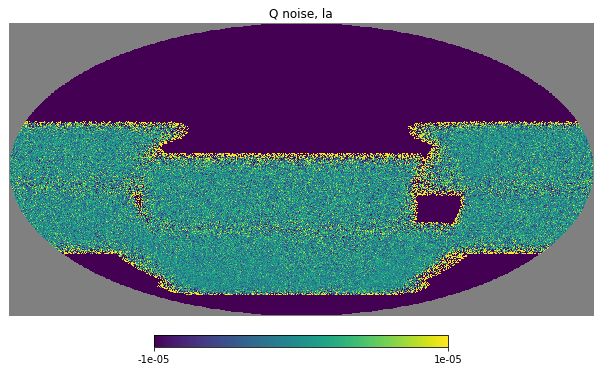

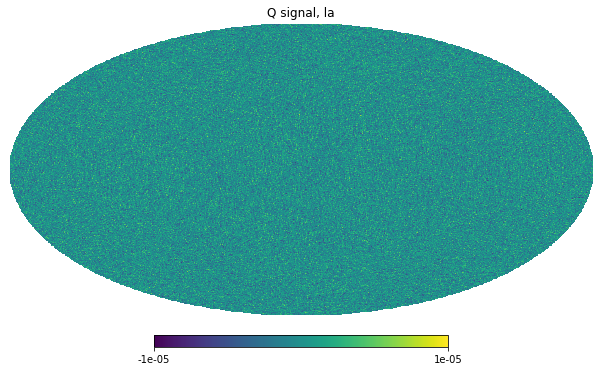

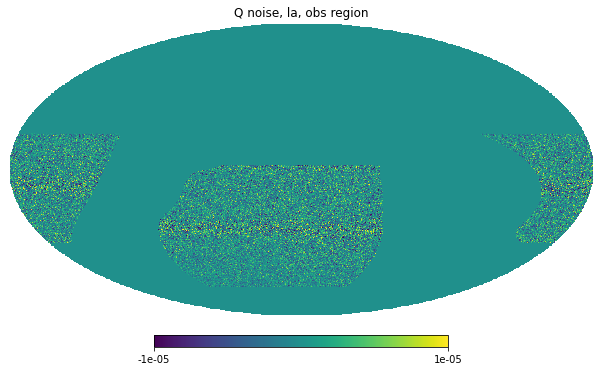

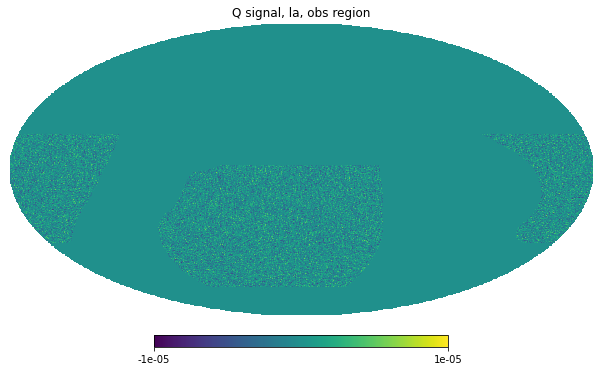

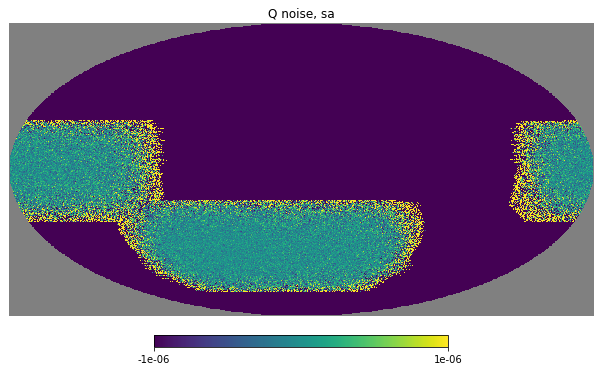

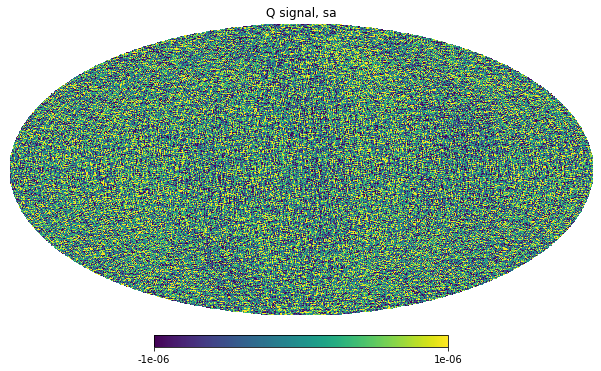

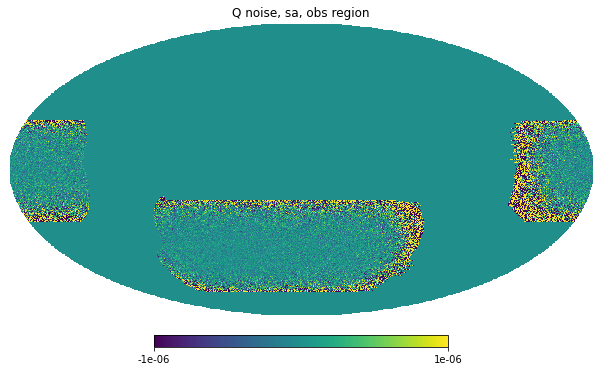

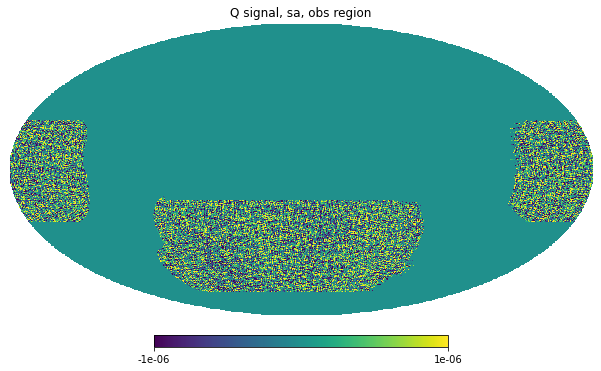

In [6]:
for t, v in [('la',1e-5),('sa',1e-6)]:
    hp.mollview(nQmap[t],min=-v,max=v,title='Q noise, '+t)
    hp.mollview(sQmap[t],min=-v,max=v,title='Q signal, '+t)
    hp.mollview(M[t]*nQmap[t],min=-v,max=v,title='Q noise, '+t+', obs region')
    hp.mollview(M[t]*sQmap[t],min=-v,max=v,title='Q signal, '+t+', obs region')